<center>
    
    Gradient Descent
    
    Author: Daniel Coble, Zhymir Thomson
</center>

In the last notebook on linear regression, we saw that the minimum to the function $L(\beta)$ actually had a closed form solution -- that is, there was an equation like $\beta = ...$. That's rare in machine learning. The more common approach is what is called gradient descent -- calculating the derivative (or gradient) of the loss function and moving the weights in the way that minimizes loss. The gradient of loss with respects to weights is a vector:
$$ \frac{\partial L}{\partial \beta} = \left(\frac{\partial L}{\partial \beta_1}, \frac{\partial L}{\partial \beta_2},...\right)$$
So moving $\beta$ in the direction of $\frac{\partial L}{\partial \beta}$ would increase $L$. In fact, moving in the direction of the gradient is the quickest way to increase $L$ -- it's the "direction of greatest ascent." Moving in the direction opposite to the gradient is "the direction of greatest descent." In gradient descent, we calculate this gradient, take a small step in that direction, then recalculate the gradient and repeat. The size of the small step, $\epsilon$ is called the learning rate. The equation for gradient descent is:
$$\beta' = -\epsilon\frac{\partial L}{\partial \beta} $$
In this notebook, we'll do two examples of gradient descent: one one-dimensional problem and one two-dimensional problem. You may not get how this relates to machine learning yet - the next few notebooks will get there.

For the one dimensional example, we'll do gradient descent on the quartic function
$$ f(x) = \frac15x^4 + \frac1{10}x^3-\frac45x^2-\frac1{10}x$$
It's derivative is
$$f'(x) = \frac45x^3 + \frac3{10}x^2-\frac85x-\frac1{10} $$

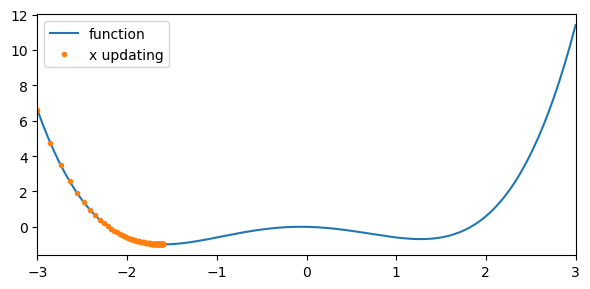

In [8]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: 1/5*x**4 + 1/10*x**3 - 4/5*x**2 - 1/10*x
df = lambda x: 4/5*x**3 + 3/10*x**2 - 8/5*x - 1/10
epsilon = .01
n_steps = 100

x = -3
# record the history of beta for plots
x_history = np.zeros(n_steps)
fx_history = np.zeros(n_steps)

for i in range(n_steps):
    fx = f(x)
    grad = df(x)
    x_history[i] = x
    fx_history[i] = fx
    
    x -= epsilon*grad

# make a plot
x_range = np.linspace(-3,3, num=200)
fx_range = f(x_range)

plt.figure(figsize=(6,3))
plt.plot(x_range, fx_range, label='function')
plt.plot(x_history, fx_history, marker='.', linewidth=0, label='x updating')
plt.xlim((-3,3))
plt.legend()
plt.tight_layout()

Experiment with changing the starting value of $x$ in the above code. You should notice that depending on where you start $x$, it may end up at either -1.586 or 1.273. The actual global minimum is at -1.586, but this brings up a problem with gradient descent: a point can get trapped at *local minima* without finding the global minimum. Also experiment with changing $\epsilon$ and notice how it affect the rate of convergence. If you chose too large of an $\epsilon$, can you get the process to break?

Now let's do a 2D problem. Instead of derivatives we use gradients, but it's practically the same. Consider the two-dimensional quadratic of the vector $x=(x_1, x_2)$
$$ f(x) = 4x_1^2 + 1.1x_1x_2+2x_2^2+1.5x_1-0.4x_2 $$
It's gradient is
$$\nabla f = \left(8x_1+1.1x_2+1.5, 1.1x_1+4x_2-0.4\right)$$

Text(0.5, 0, '$f(x)$')

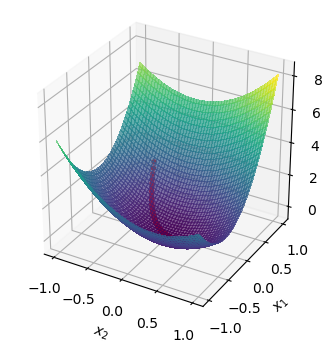

In [16]:
f = lambda x_1, x_2: 4*x_1**2 + 1.1*x_1*x_2 + 2*x_2**2 + 1.5*x_1 -.4*x_2
df = lambda x_1, x_2: (8*x_1+1.1*x_2+1.5, 1.1*x_1+4*x_2-0.4)

epsilon = .01
n_steps = 100
x = [.5, -.5]

x_history = np.zeros((n_steps, 2))
fx_history = np.zeros(n_steps)

for i in range(n_steps):
    fx = f(x[0], x[1])
    grad = df(x[0], x[1])
    x_history[i] = x
    fx_history[i] = fx
    
    x[0] -= epsilon*grad[0]
    x[1] -= epsilon*grad[1]

# make a plot
from matplotlib import markers
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(projection='3d'))
ax.set_box_aspect([1, 1, 1])
x_1_axis = np.linspace(-1, 1, 100)
x_2_axis = np.linspace(-1, 1, 100)
x_1_mesh, x_2_mesh = np.meshgrid(x_1_axis, x_2_axis)
f_mesh = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        f_mesh[i,j] = f(x_1_mesh[i,j], x_2_mesh[i,j])
ax.plot_surface(x_2_mesh, x_1_mesh, f_mesh, cmap='viridis', alpha=.70, antialiased=False)
style = markers.MarkerStyle(marker='o', fillstyle='full')
ax.scatter(x_history[:,1], x_history[:,0],fx_history, s=15, alpha=1, linewidths=0, c='red')
ax.set_xlabel('$x_2$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('$f(x)$')

Let's do something that looks at least a bit like machine learning. I've created a dataset which has points in two clusters. Let's call these points $\{\hat{x}_i\}_{i=1}^N$. Our goal will be to identify which points belong to which clusters. We'll do this by having our $\beta$ be two points: $\beta=(x_a,x_b)=(x_{a,1},x_{a,2},x_{b,1},x_{b,2})$. Our loss function is the sum over all points, the minimum distance between that point and $x_a$ or $x_b$, squared.
$$ L(\beta) = \sum_{i=1}^N \min\{\|\hat{x}_i-x_a\|^2, \|\hat{x}_i-x_b\|^2\}$$
The idea is that $L$ is at a minimum when one of $x_a$ and $x_b$ is at the center of each cluster. The gradients are easy to calculate (but please satisfy yourself that these are correct.
$$ \nabla x_a = \sum_{i=1}^N \left(-2\left(\hat{x}_i-x_a\right) \text{ if } \|\hat{x}_i-x_a\|^2 < \|\hat{x}_i-x_b\|^2, \text{ else } 0\right)$$
$$ \nabla x_b = \sum_{i=1}^N \left(-2\left(\hat{x}_i-x_b\right) \text{ if } \|\hat{x}_i-x_a\|^2 > \|\hat{x}_i-x_b\|^2, \text{ else } 0\right)$$
This a gradient-descent-based k-means clustering algorithm and is used for categorization of unlabelled data.

**Challenge Problem**

Implement this.

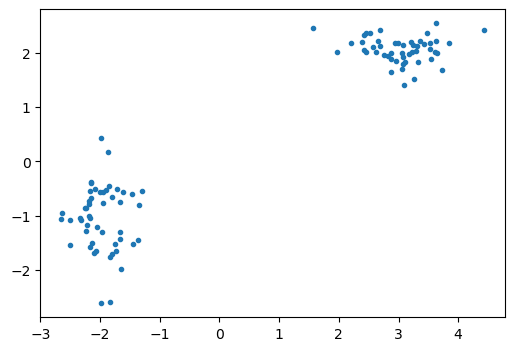

In [18]:
data = np.load('./data/clusters.npy')

plt.figure(figsize=(6,4))
plt.plot(data[:,0], data[:,1], marker='.', linewidth=0)